In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import pickle


In [2]:
# Set plot style
sns.set(color_codes=True)
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns',100)

# Loading Data

In [80]:
train_data = pd.read_csv('ml_case_training_data.csv')
churn_data = pd.read_csv('ml_case_training_output.csv')
history_data = pd.read_csv('ml_case_training_hist_data.csv')

In [81]:
train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


Need to resolve the NAN in train_data

In [82]:
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [83]:
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


**Merging Dataset**

In [84]:
train = train_data.merge(churn_data, on='id')

In [85]:
train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


# General statistics of datafrae
Following we want to check the datatype of data, which can suggest us how to do data preprocessing.  

Such as convert '2012-02-03' to datetime object

In [256]:
pd.DataFrame({'Data_type': train.dtypes})

,Data_type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [23]:
pd.DataFrame({'History_Data_type': history_data.dtypes})

,History_Data_type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


## Dataframe statistics

In [24]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


### Insight
1. (Missed before) **KEY: the minimum of consumption & forecastas is negative** This could means the Clients also generate power and 'return' thes energy, which is unlikely. **Such result indicate this data is corrupted**
2. Later will find out "Camaign_disc_ele" is completly empty.
3. Highly skewed data when looks at percentiles

In [25]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## Missing Data

In [23]:
total_null = train.isnull().sum().sort_values(ascending = False)
null_percentage = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_null, null_percentage],keys=['Total_null','Null_percentage'] ,axis = 1)
missing_data

,Total_null,Null_percentage
campaign_disc_ele,16096,1.000000
forecast_base_bill_ele,12588,0.782058
date_first_activ,12588,0.782058
forecast_cons,12588,0.782058
forecast_bill_12m,12588,0.782058
forecast_base_bill_year,12588,0.782058
activity_new,9545,0.593004
channel_sales,4218,0.262053
date_modif_prod,157,0.009754
forecast_discount_energy,126,0.007828


**Note that we might need to remove a few columns since they have more than 75% null percentage** 

In [24]:
Discarded_columns = missing_data[missing_data.Null_percentage > 0.75].index
Discarded_columns

Index(['campaign_disc_ele', 'forecast_base_bill_ele', 'date_first_activ',
       'forecast_cons', 'forecast_bill_12m', 'forecast_base_bill_year'],
      dtype='object')

In [25]:
# Null for history data
total_null = history_data.isnull().sum().sort_values(ascending = False)
null_percentage = (history_data.isnull().sum() / history_data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_null, null_percentage],keys=['Total_null','Null_percentage'] ,axis = 1)
missing_data

,Total_null,Null_percentage
price_p1_var,1359,0.007041
price_p2_var,1359,0.007041
price_p3_var,1359,0.007041
price_p1_fix,1359,0.007041
price_p2_fix,1359,0.007041
price_p3_fix,1359,0.007041
id,0,0.000000
price_date,0,0.000000


**As for history data, the null percentage is small, can easily to be dealt with**

# Data visualization

In [74]:
def annotate_stacked_bar(ax, pad=0.99, colour = 'white', textsize=13):
    """
    Add values annotations to the bars
    """
    # Iterate over the plotted rectageL
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value =='0.0':
            continue
        ax.annotate(value,
                   ((p.get_x()+ p.get_width()/2) * pad-0.05, ((p.get_y())+p.get_height()/2)*pad),
                    color = colour,
                    size= textsize
                   )

def plot_stacked_bars(df, title_, size_ = (18,10), rot_=0, legend_='upper right'):
    """
    Plot stacked bars with annotations
    """
    ax = df.plot( kind = "bar",
                 stacked = True,
                 figsize = size_,
                 rot= rot_,
                 title= title_
                )
    # Annotate bars
    annotate_stacked_bar(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention","Churn"], loc=legend_)
    # Label
    plt.ylabel("Company base(%)")
    plt.show()
    

In [75]:
churn_total = churn_data.groupby(churn_data['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

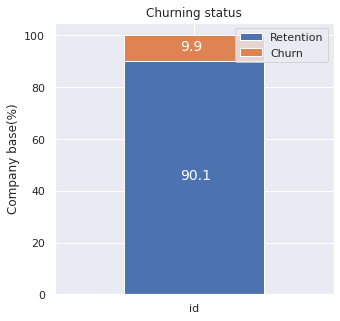

In [78]:
plot_stacked_bars(churn_percentage.T,"Churning status",(5,5))

In [ ]:
# KEY, df need to transpose, to seperate categories, then stacked = True will do the effec
# churn_percentage.plot(kind="bar",stacked=True, rot= 1)
# churn_percentage.T.plot(kind="bar",stacked=True, rot= 1)

We can observe about 10% of total customers have churned(Reasonable ratio)

----
## SME activities(Previous missed)
Let's inspect how the SME activities is correlated with churn

In [84]:
activity = train[['id','activity_new','churn']]

In [98]:
# Group by ['activity_new' and 'churn'], then count the unique ID, can show how many customers 
# belong to ceratin category of activities
activity.groupby([activity['activity_new'],activity['churn']])['id'].count()
# before unstack, the col is churn and how many corresponding customers

activity = activity.groupby([activity['activity_new'],activity['churn']])['id'].count().unstack(level=1).sort_values(by=[0],ascending = False)    
# after unstack, the col become "Whether churned"

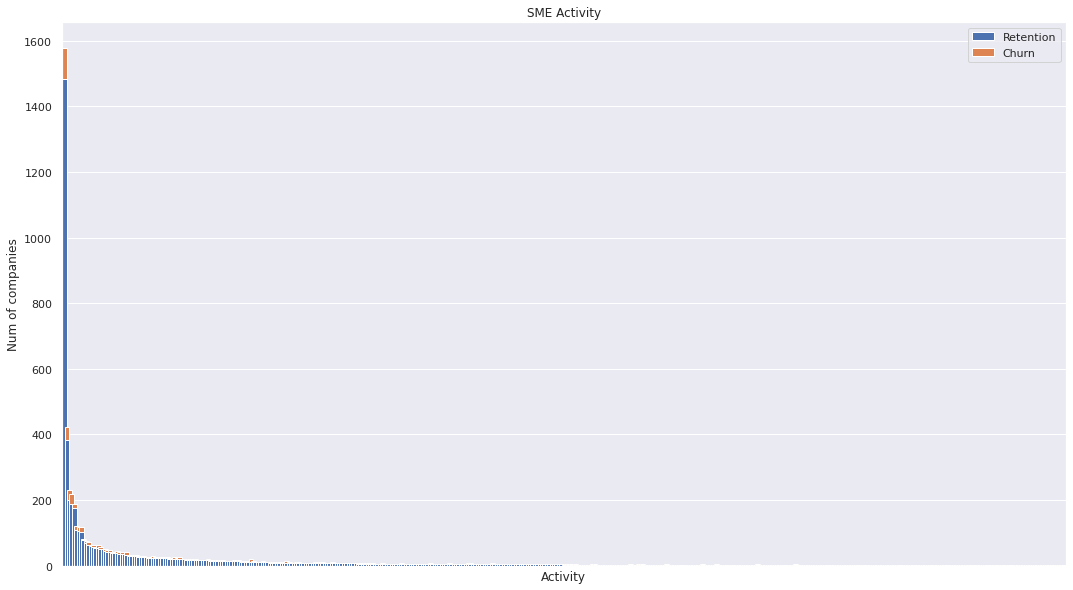

In [101]:
activity.plot(kind = "bar",
             figsize = (18,10),
             width = 2,
             stacked = True,
             title = "SME Activity")
# Labels
plt.ylabel('Num of companies')
plt.xlabel('Activity')
#Legend
plt.legend(['Retention','Churn'], loc="upper right")
# remove label of xtick, since they're encoded
plt.xticks([])
plt.show()


We can see **churn is not specifically realted to any SME category in particular**  
If we take a further look at the values percenatage-wise

In [109]:
activity.isnull().sum()

churn
0      8
1    233
dtype: int64

In [116]:
# Count the total number of company in each category, including churn and non-churn
activity_total = activity.fillna(0)[0] + activity.fillna(0)[1]  
activity_percentage = activity.fillna(0)[1] / activity_total *100
pd.DataFrame({ "Churn Percentage": activity_percentage,
              "Total companies": activity_total
            }).sort_values(by="Total companies", ascending = False)

,Churn Percentage,Total companies
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,5.897273,1577.0
kkklcdamwfafdcfwofuscwfwadblfmce,9.004739,422.0
kwuslieomapmswolewpobpplkaooaaew,13.043478,230.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,14.611872,219.0
ckfxocssowaeipxueikxcmaxdmcduxsa,6.878307,189.0
...,...,...
eckbfdkkkfoxpeffpacbikwpeicksulu,0.000000,1.0
eamiapdokbfumefocubefudcowecllla,0.000000,1.0
dxmfpsflslufmxlmwdmbkikffowmfmum,0.000000,1.0


In [117]:
pd.DataFrame({ "Churn Percentage": activity_percentage,
              "Total companies": activity_total
            }).sort_values(by="Churn Percentage", ascending = False)

,Churn Percentage,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.0,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.0,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.0,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.0,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.0,2.0
...,...,...
pudsxpkefiudxxfcumemocbpuklxiufa,0.0,8.0
ambaaxsxxwfuspsuabupewfpbbksmcoo,0.0,2.0
sbolemmfddlosupuwbcawusmbwmdmdfw,0.0,2.0


Note: In some categories, the churn percentage can rise to 100%, but it also due to the fact that only a few companies belong to that activity   
  
On the other hand, for those croweded categories, the churn percentage tends to be low
**Impact from SME activity on predictive model**

    It is likely that the predictive model will struggle predicting the SME activity due to the large number of categories and low number of companies belonging to each category
    
---
## Sales channel(Previous missed)

The sales channel may be important as well, it's not the same if the sales were through email or throgh telephone  

In [121]:
channel = train[['id','channel_sales','churn']]

In [126]:
channel = channel.groupby(['channel_sales','churn'])['id'].count().unstack(level = 1).fillna(0)

In [127]:
channel

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,4.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0


In [131]:
# Perform seperate division to churn and non-churn, 
channel_churn = (channel.div(channel.sum(axis = 1), axis = 0) *100).sort_values(by= [1], ascending = False)

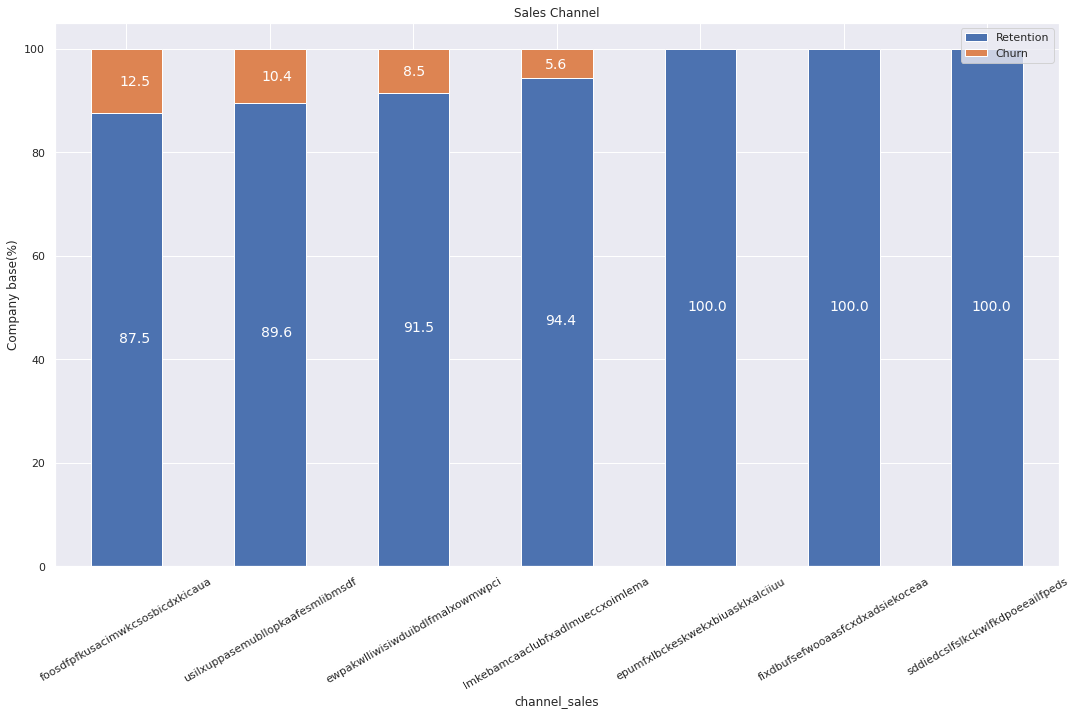

In [133]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_ = 30)


Take a look at percentage-wise  
Col:  churn percentage, total companies  

In [145]:
churn_percentage = channel[1] / channel.sum(axis=1) *100
total_companies = channel.sum(axis=1)
pd.DataFrame({ 'Churn Percentage': churn_percentage,
              'Total Companies': total_companies
            }).sort_values(by='Churn Percentage',ascending = False)

,Churn Percentage,Total Companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


In [143]:
total_companies

channel_sales
epumfxlbckeskwekxbiuasklxalciiuu       4.0
ewpakwlliwisiwduibdlfmalxowmwpci     966.0
fixdbufsefwooaasfcxdxadsiekoceaa       2.0
foosdfpfkusacimwkcsosbicdxkicaua    7377.0
lmkebamcaaclubfxadlmueccxoimlema    2073.0
sddiedcslfslkckwlfkdpoeeailfpeds      12.0
usilxuppasemubllopkaafesmlibmsdf    1444.0
dtype: float64

## Consumption

In [147]:
consumption = train[['id','cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]  

In [152]:
def plot_distribution(df, column, ax, bins_ = 50):
    """
    Plot variable distribution in a stacked histogram of churned or retained comopany
    """
    tmp = pd.DataFrame({"Retention": df[df['churn'] == 0][column],
                        "Churn": df[df['churn'] == 1][column]
                        })
    # Plot the histogram
    tmp.plot(kind = 'hist',
            bins = bins_,
             ax =ax,
             stacked = True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style = 'plain', axis = 'x')

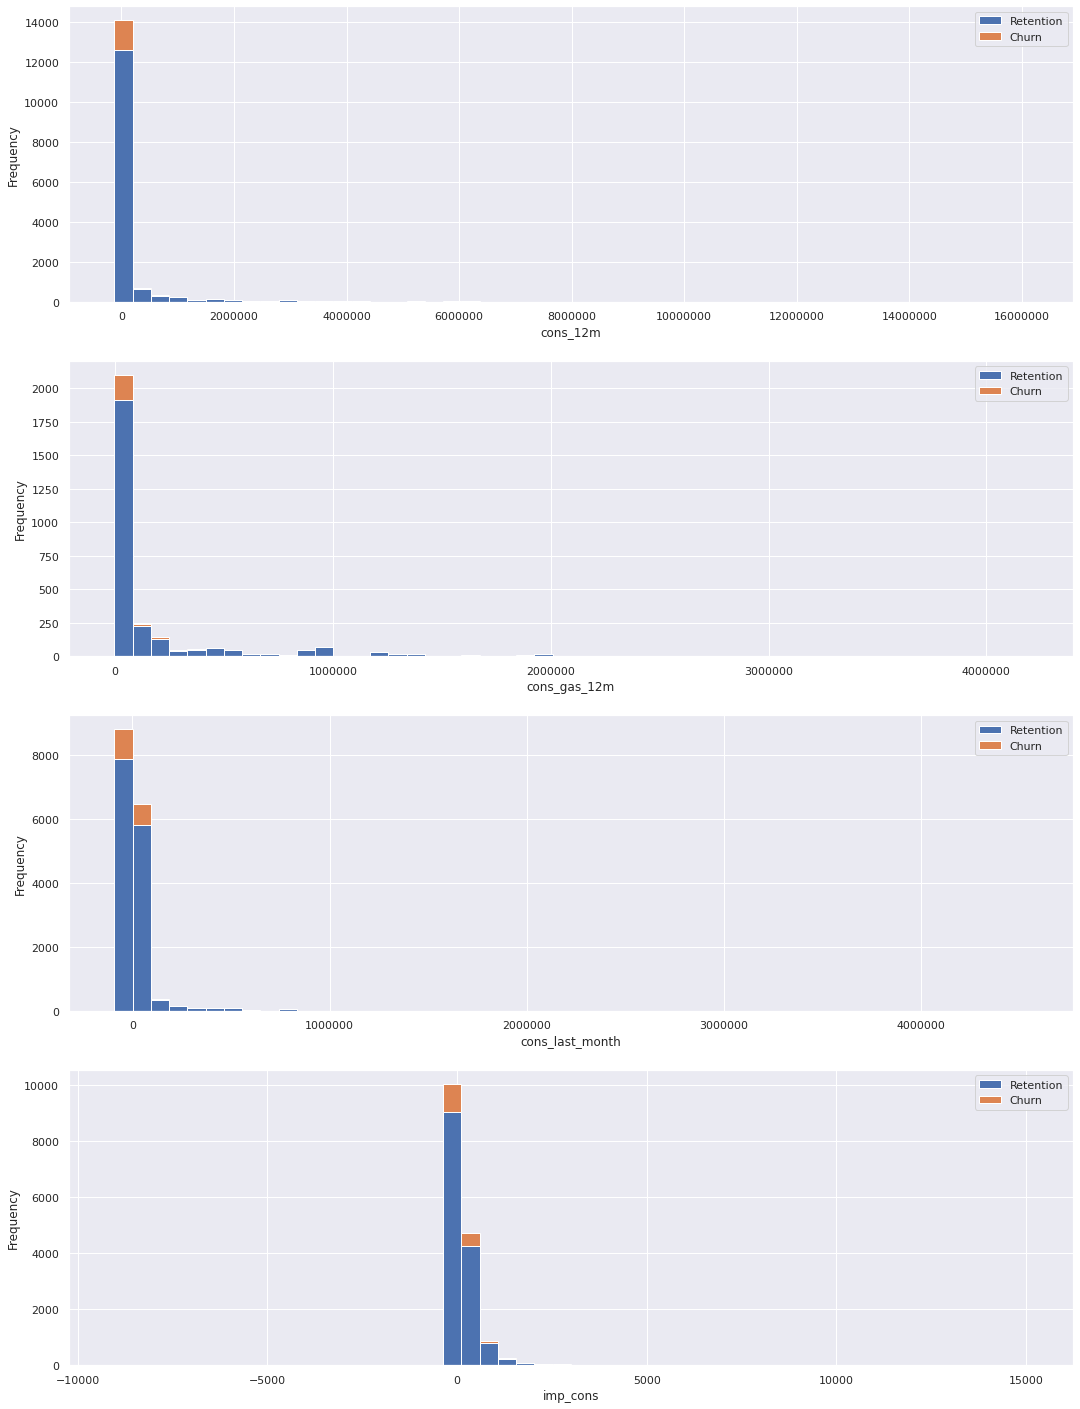

In [155]:
fig, axs = plt.subplots(nrows = 4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption,"cons_12m", axs[0])
plot_distribution(consumption[consumption['has_gas']=='t'], "cons_gas_12m", axs[1])
plot_distribution(consumption,"cons_last_month", axs[2])
plot_distribution(consumption,"imp_cons", axs[3])
# plot_distribution(consumption,"cons_12m", axs[0])

We can cleary see that the consumption is highly **skewed to the right**,presenting a very long tail towards the high values of the distribution  
<br>
We can use box-plot to further visualize outliers.It also can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightlyour data is grouped, and if and how our data is skewed.

/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/b

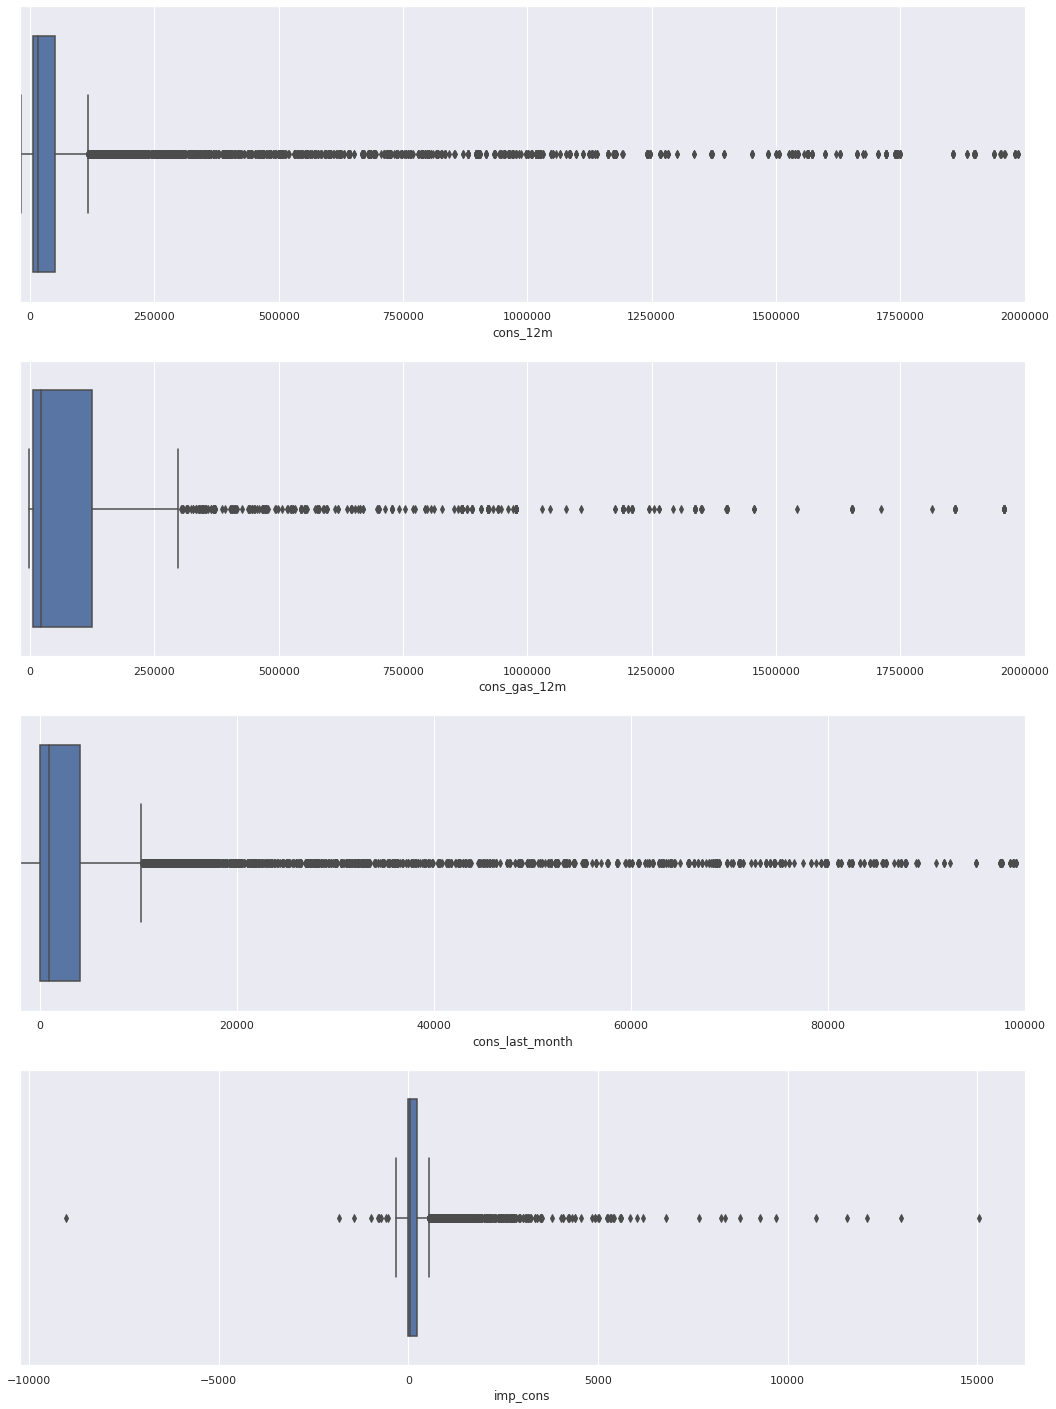

In [161]:
fig, axs = plt.subplots(nrows = 4, figsize=(18,25))
# plot box-plot
sns.boxplot(consumption['cons_12m'], ax= axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'], ax= axs[1])
sns.boxplot(consumption['cons_last_month'], ax= axs[2])
sns.boxplot(consumption['imp_cons'], ax= axs[3])
for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
# Set x-axis limit
axs[0].set_xlim(-20000,2000000)
axs[1].set_xlim(-20000,2000000)
axs[2].set_xlim(-2000,100000)
plt.show()

It is very clear now that we have a **highly skewed distribution, and numerous outliers**.
We will deal with the skewness and outliers in the next exercise (Data cleaning)

## Forecast

In [163]:
forecast_col = ["id","forecast_base_bill_ele","forecast_base_bill_year","forecast_bill_12m"
                ,"forecast_cons","forecast_cons_12m","forecast_cons_year","forecast_discount_energy",
                "forecast_meter_rent_12m","forecast_price_energy_p1","forecast_price_energy_p2","forecast_price_pow_p1"
                ,"churn"
                ]

forecast = train[forecast_col]

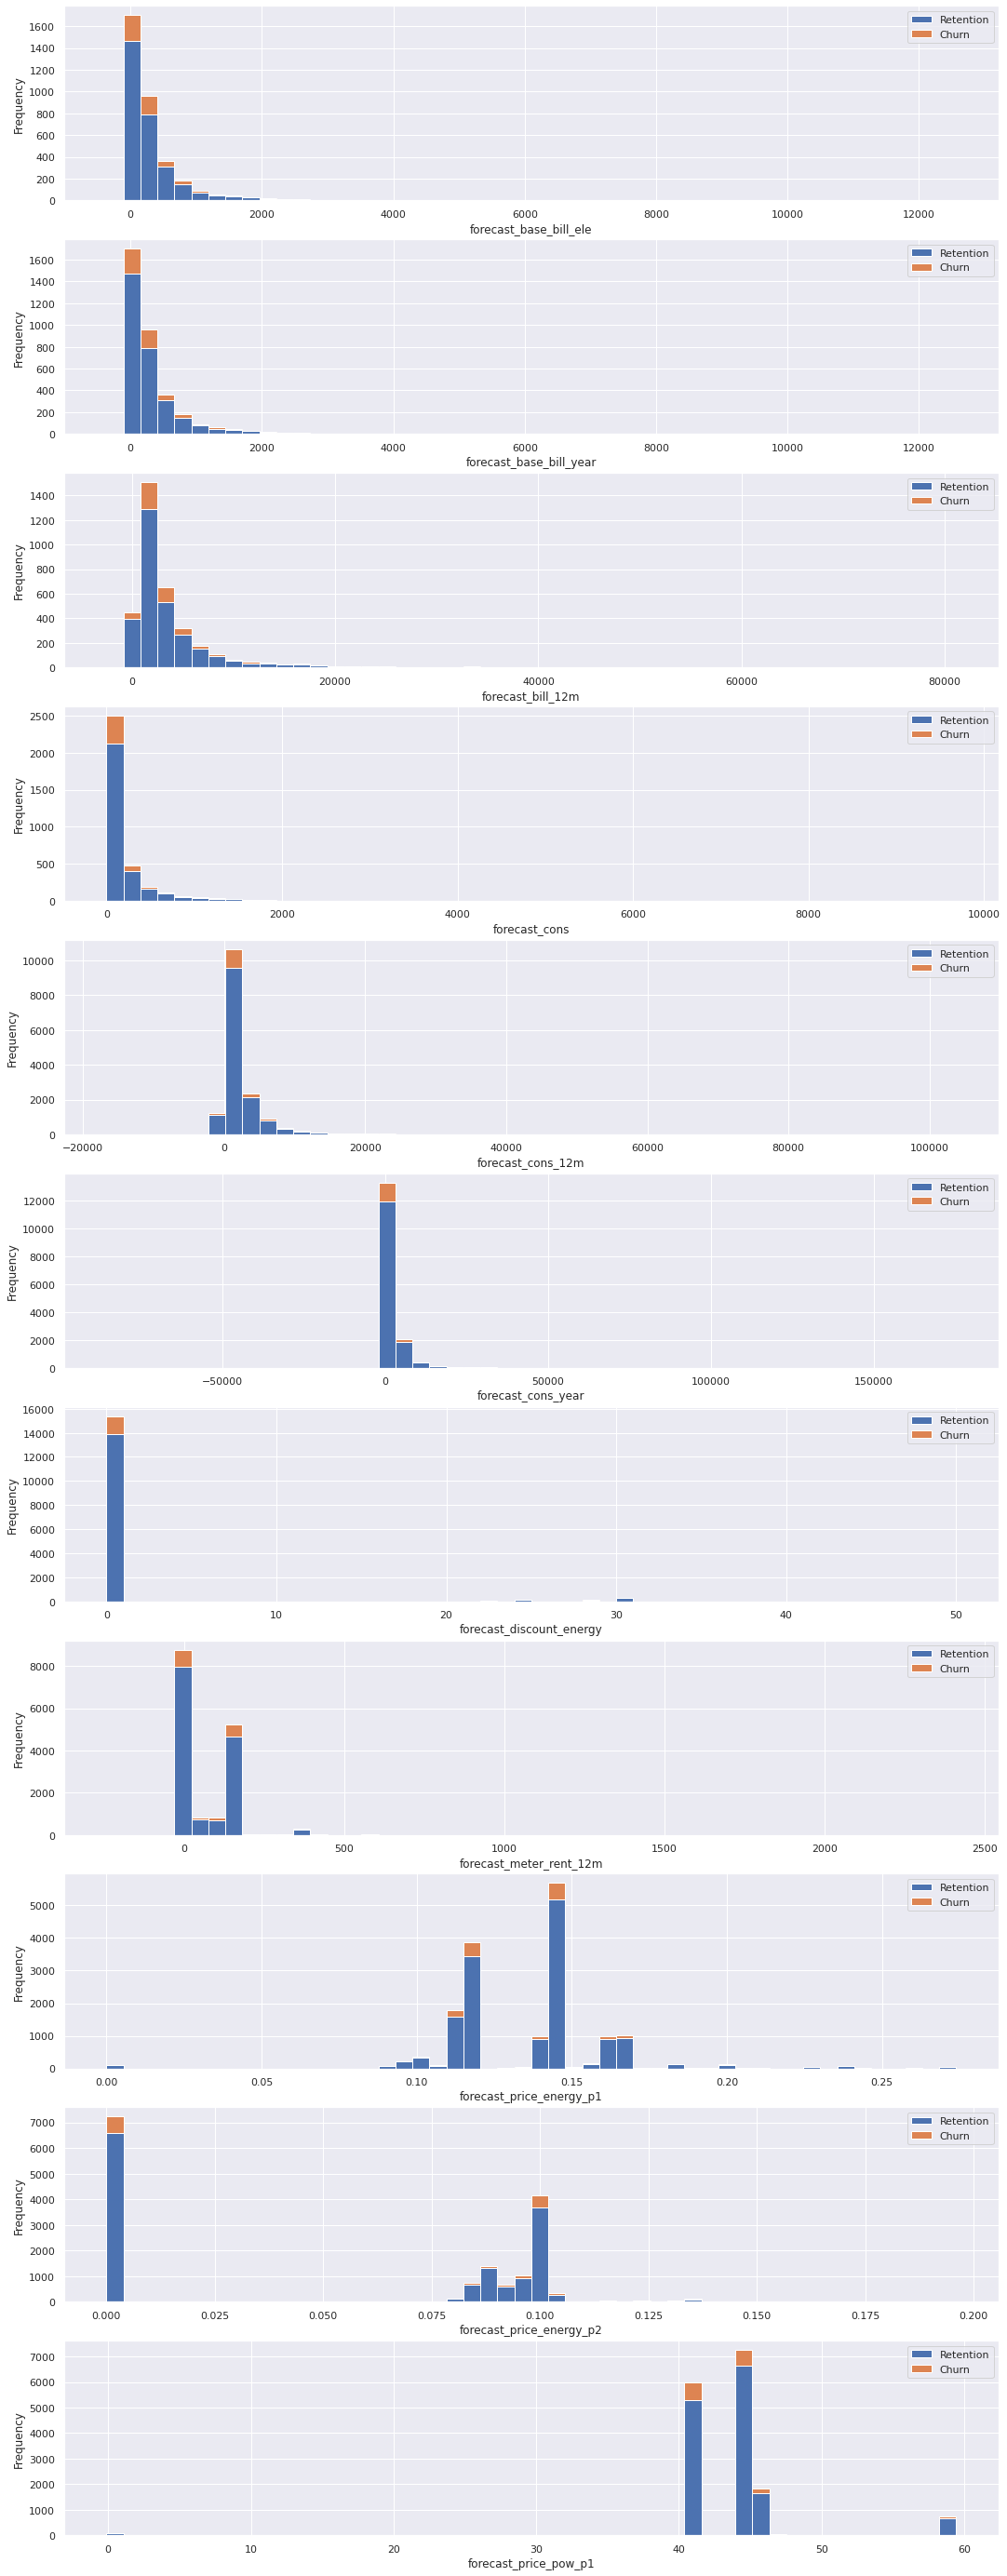

In [167]:
fig ,axs = plt.subplots(nrows = 11, figsize=(18,50))
# plot histogram
for i in range(1,len(forecast_col)-1):
    plot_distribution(train, forecast_col[i],axs[i-1])

Similarly to the consumption plots, we can observe that a **lot of the variables are highly skewed to the right, creating a very long tail on the highervalues.**  
We will make some transformations to correct for this skewness

## Margins

/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brian/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


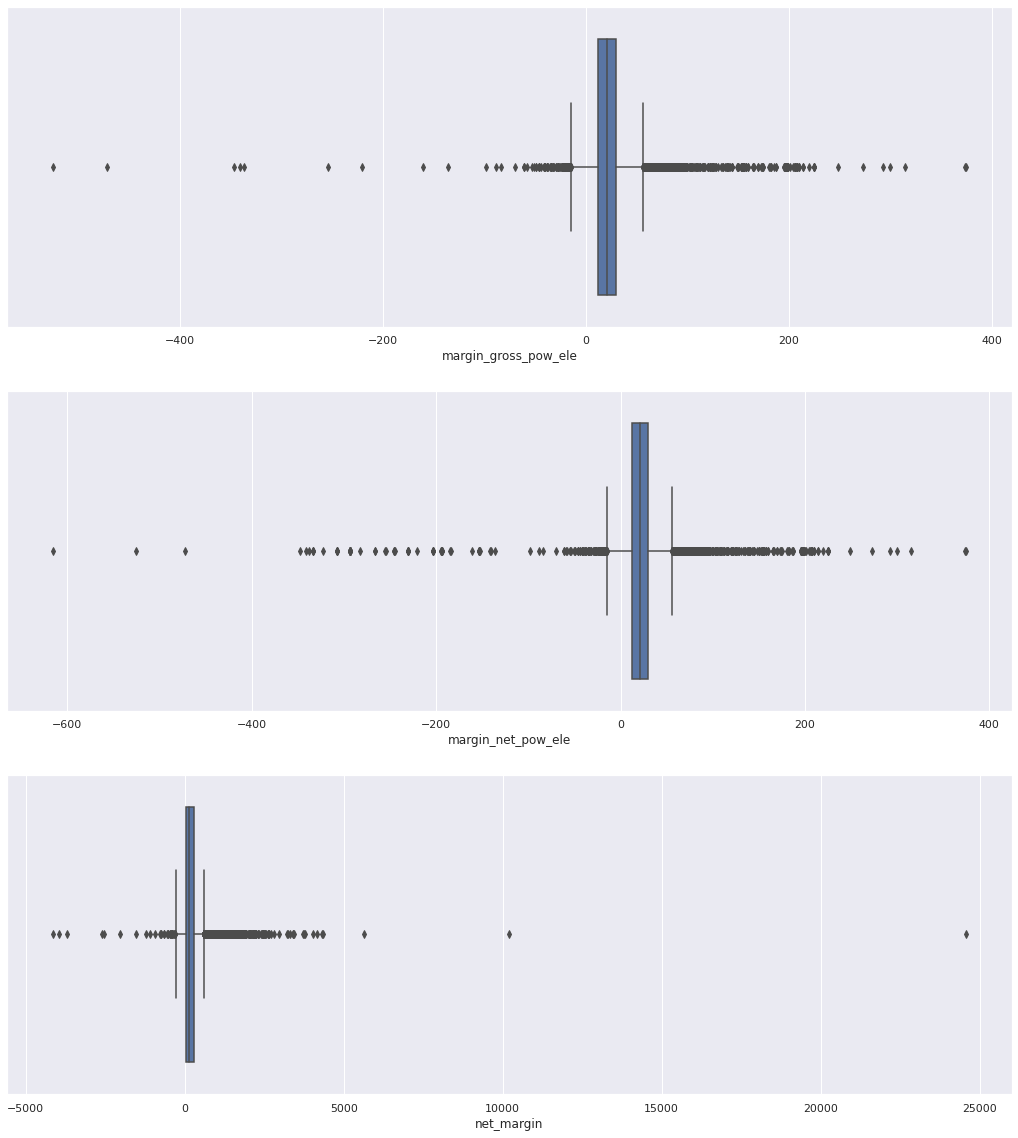

In [168]:
fig ,axs = plt.subplots(nrows = 3, figsize=(18,20))
# plot boxplot
sns.boxplot(train['margin_gross_pow_ele'], ax = axs[0])
sns.boxplot(train['margin_net_pow_ele'], ax = axs[1])
sns.boxplot(train['net_margin'], ax = axs[2])

# Remove scientific notation
plt.show()


We can observe a few outliers in here as well.  

#  Data Cleaning

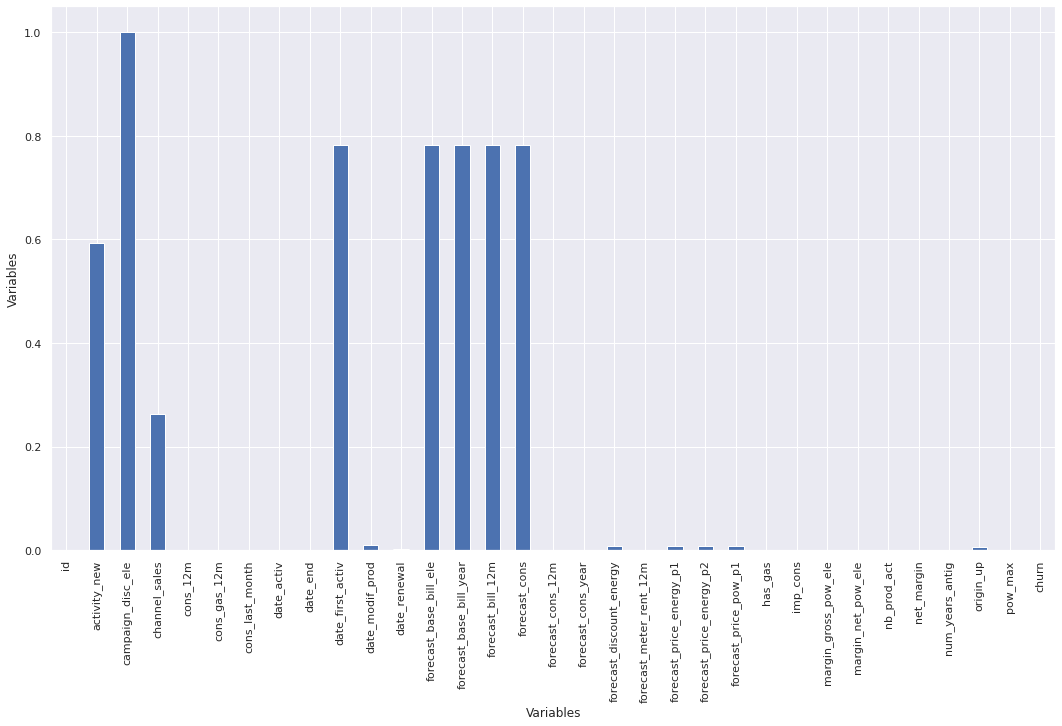

In [172]:
(train.isnull().sum() / train.isnull().count()).plot(kind = 'bar', figsize =(18,10))

plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

In [86]:
train = train.drop(columns = Discarded_columns)

In [87]:
## Delete Duplicates
# train = train.T.drop_duplicates().T

In [88]:
train.shape

(16096, 27)

In [89]:
num_col = train._get_numeric_data().columns.tolist()
cat_col = set(train.columns) - set(num_col)


In [90]:
num_col

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'churn']

## Deal with missing date in train_data

In [92]:
date_col = ["date_activ", "date_end", "date_modif_prod", "date_renewal"]
null_col = set(cat_col) - set(date_col)
for col in date_col:
    # Fill the categorical column with Mode
    mode = train[col].mode()[0]
    train[col].fillna(mode, inplace=True)

for col in null_col:
    # Fill the categorical column with Mode
    train[col].fillna("null_value", inplace=True)

In [93]:
train[cat_col].isnull().sum()

date_end           0
id                 0
activity_new       0
has_gas            0
date_modif_prod    0
date_activ         0
origin_up          0
date_renewal       0
channel_sales      0
dtype: int64

In [94]:
for col in num_col:
    train[col].fillna(train[col].median(), inplace = True)

In [95]:
train[num_col].isnull().sum()

cons_12m                    0
cons_gas_12m                0
cons_last_month             0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
pow_max                     0
churn                       0
dtype: int64

## Deal with missing data in history data

In [71]:
h_num_col = history_data._get_numeric_data().columns

In [72]:
for col in h_num_col:
    history_data[col].fillna(history_data[col].median(), inplace= True)


In [73]:
history_data.isnull().sum()

id              0
price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

In [74]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see that there are negative values for   
**price_p1_fix, price_p2_fix and price_p3_fix.**  
Further exploring on those we can see there are only about 10 entries which are **negative. This is more likely to be due to corrupted data rather thana "price discount".**  
We will replace the negative values with the median  


In [75]:
deal_col = ["price_p1_fix", "price_p2_fix", "price_p3_fix"]

for col in deal_col:
#     print(history_data[history_data[col] < 0][col])
    history_data.loc[history_data[col] < 0, col] = history_data[col].median()

In [76]:
# Check
for col in deal_col:
    print(history_data[history_data[col] < 0][col])

Series([], Name: price_p1_fix, dtype: float64)
Series([], Name: price_p2_fix, dtype: float64)
Series([], Name: price_p3_fix, dtype: float64)


In [77]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [96]:
train['date_activ'] = pd.to_datetime(train['date_activ'], format='%Y-%m-%d')
train['date_end'] = pd.to_datetime(train['date_end'], format='%Y-%m-%d')
train['date_modif_prod'] = pd.to_datetime(train['date_modif_prod'], format='%Y-%m-%d')
train['date_renewal'] = pd.to_datetime(train['date_renewal'], format='%Y-%m-%d')

In [97]:
history_data['price_date'] = pd.to_datetime(history_data["price_date"], format = '%Y-%m-%d')

# Pickling

In [98]:
pd.to_pickle(train, 'Processed_train_data.pkl')
pd.to_pickle(history_data, 'Processed_history_data.pkl')